The data is obtained from the Centers of Medicare and Medicaid Services https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Inpatient to add the time component to the analysis I combined 3 datasets from 2015, 2016, and 2017 years. Some of the questions I want to answer:
- What are the total charges, Medicare payments and total payments in the USA and each state (2015, 2016, 2017)
- Which Diagnostic Related Groups cost Medicare the most?
- What are the most commong hospital discharges? 
- What is the trend in last 3 years?
- Which States and Hospitals charge the most? etc.

Some of the variables:

* DRG Definition - Medicare Severity Diagnosis Related Group
* Total Discharges - The total discharges indicate the number of beneficiaries who were released from the inpatient hospital after receiving care.
* Average Covered Charges -  refers to what the provider bills to Medicare (Hospitals determine what they will charge for items and services provided to patients and these charges are the amount the hospital bills for an item or service) 
* Average Total Payments - refers to what Medicare actually pays to the provider as well as co-payment and deductible amounts that the beneficiary is responsible for and payments by third parties for coordination of benefits
* Average Medicare Payments - The average amount that Medicare pays to the provider for Medicare's share of the MS-DRG. (Medicare payments DO NOT include beneficiary co-payments and deductible amounts nor any additional payments from third parties for coordination of benefits)

In [2]:
library(tidyverse)
library(lubridate)

In [3]:
data1 <- read.csv("2015.csv", stringsAsFactors = FALSE, dec=",")
data2 <- read.csv("2016.csv", stringsAsFactors = FALSE, dec=",")
data3 <- read.csv("2017.csv", stringsAsFactors = FALSE, dec=",")

In [203]:
head(data3)

DRG.Definition,Provider.Id,Provider.Name,Provider.Street.Address,Provider.City,...,Total.Discharges,Average.Covered.Charges,Average.Total.Payments,Average.Medicare.Payments,Year
023 - CRANIOTOMY W MAJOR DEVICE IMPLANT OR ACUTE CNS PDX W MCC OR CHEMOTHE,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,...,28,117117.7857,25823.71429,24057.39286,2017
025 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL PROCEDURES W MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,...,32,98357.5625,20688.34375,19791.40625,2017
027 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,...,11,69153.54546,11811.18182,8194.363636,2017
037 - EXTRACRANIAL PROCEDURES W MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,...,12,100427.3333,19134,18154,2017
038 - EXTRACRANIAL PROCEDURES W CC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,...,17,58199.47059,8519.470588,6714.882353,2017
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,...,41,41130.56098,5925.95122,4808,2017


#####Adding Year variable to the datasets

In [204]:
data1$Year <- 2015
data2$Year <- 2016
data3$Year <- 2017

#####I will combine the datasets with rbind. rbind combines datasets by rows. (In order to combine the datasets, the number and the names of the columns must be the same in the datasets)

In [205]:
payment <- rbind(data1, data2, data3)
dim(payment)

[1] 595484     13

#####Covered charges, medicare payments and total payments contain both $ dollar signs and commas, in order to do data manipulation/aggregation I will convert those variables into numeric values and remove  dollar signs and commas.

In [206]:
payment$Average.Covered.Charges <- as.numeric(gsub("[\\$,]","", payment$Average.Covered.Charges))
payment$Average.Medicare.Payments <- as.numeric(gsub("[\\$,]","", payment$Average.Medicare.Payments))
payment$Average.Total.Payments <- as.numeric(gsub("[\\$,]","", payment$Average.Total.Payments))

#####Check for NA values

In [207]:
sum(is.na(payment))

[1] 0

In [208]:
df_top17 <- payment %>% filter(Year == 2017) %>% mutate(total_c = Average.Covered.Charges*Total.Discharges,
                        total_p = Average.Medicare.Payments*Total.Discharges) %>% 
  group_by(Provider.State) %>%
  summarise(total_charges=sum(total_c), total_paid = sum(total_p),
            ratio_paid_charged = sum(total_p)/sum(total_c)) 
df_top17 <- df_top17 %>% top_n(15, wt = total_charges) %>%  mutate(country_medicare_charges = sum(df_top17$total_charges), charges_proportion = total_charges/country_medicare_charges) %>%
  arrange(desc(total_charges))
knitr::kable(df_top17)



|Provider.State | total_charges| total_paid| ratio_paid_charged| country_medicare_charges| charges_proportion|
|:--------------|-------------:|----------:|------------------:|------------------------:|------------------:|
|CA             |   54238882335| 8130260062|          0.1498973|             422690500183|          0.1283182|
|FL             |   40512981303| 5361111801|          0.1323307|             422690500183|          0.0958455|
|TX             |   33869714703| 4981748301|          0.1470856|             422690500183|          0.0801289|
|NY             |   27648180203| 6201262986|          0.2242919|             422690500183|          0.0654100|
|PA             |   21342203052| 3384679967|          0.1585909|             422690500183|          0.0504913|
|NJ             |   20787093641| 2897560398|          0.1393923|             422690500183|          0.0491780|
|IL             |   16964249266| 3320097855|          0.1957115|             422690500183|          0.0401340|

#####( USA ) Total Covered Charges, Medicared Payments and Total Payments in 2015, 2016 and 2017.

In [224]:
us.total <- payment %>%  mutate(total_c = Average.Covered.Charges*Total.Discharges,
                                                          total_m = Average.Medicare.Payments*Total.Discharges,
                                                            total_p = Average.Total.Payments*Total.Discharges) %>%
group_by(Year)%>%
summarise(total_charges=sum(total_c), total_paid = sum(total_p), total_medicare = sum(total_m), total_discharges = sum(Total.Discharges))
knitr::kable(us.total)



| Year| total_charges|  total_paid| total_medicare| total_discharges|
|----:|-------------:|-----------:|--------------:|----------------:|
| 2015|  379483326433| 92819287590|    78179954887|          7433268|
| 2016|  394925854654| 94095505341|    79406055620|          7229116|
| 2017|  422690500183| 97831407052|    82167894430|          7382688|

#####( Top 10 US States ) Total Covered Charges, Medicared Payments and Total Payments with proportions in 2017.

In [225]:
df_top17 <- payment %>% filter(Year == 2017) %>% mutate(total_c = Average.Covered.Charges*Total.Discharges,
                        total_m = Average.Medicare.Payments*Total.Discharges,
                        total_p = Average.Total.Payments) %>% 
  group_by(Provider.State) %>%
  summarise(total_charges=sum(total_c), total_paid = sum(total_p), total_medicare = sum(total_m))

df_top17 <- df_top17  %>% top_n(10, wt = total_charges) %>% mutate(us_total_charges = sum(df_top17$total_charges),
                                                                  charges_proportion = round(total_charges/us_total_charges,3),
                                                                  us_total_paid = sum(df_top17$total_paid),
                                                                  paid_proportion = round(total_paid / us_total_paid,3),
                                                                  us_medicare_charges = sum(df_top17$total_medicare),
                                                                  medicare_proportion = round(total_medicare / us_medicare_charges,3),
                                                                  ) %>%
select(-us_total_charges, -us_medicare_charges, -us_total_paid)%>% 
arrange(desc(total_charges))
head(df_top17, 10)

Provider.State,total_charges,total_paid,total_medicare,charges_proportion,paid_proportion,medicare_proportion
CA,54238882335,280247151,8130260062,0.128,0.102,0.099
FL,40512981303,176459678,5361111801,0.096,0.064,0.065
TX,33869714703,177373756,4981748301,0.080,0.065,0.061
NY,27648180203,190110150,6201262986,0.065,0.069,0.075
PA,21342203052,127327429,3384679967,0.050,0.046,0.041
NJ,20787093641,93552550,2897560398,0.049,0.034,0.035
IL,16964249266,118485915,3320097855,0.040,0.043,0.040
OH,13474219554,100758789,2872030687,0.032,0.037,0.035
NC,11231226395,84285551,2724293456,0.027,0.031,0.033
VA,11055572324,73563037,2197226825,0.026,0.027,0.027


In [232]:
options(repr.plot.width=4, repr.plot.height=4)

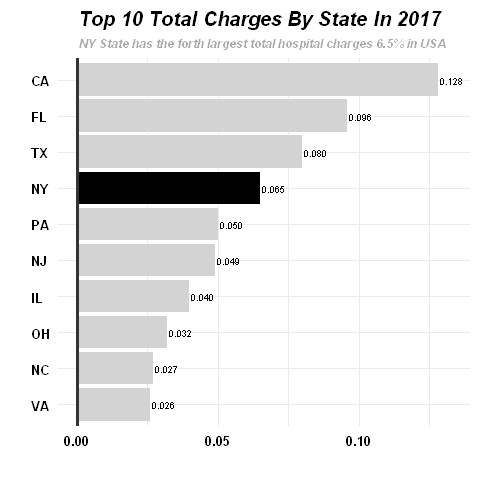

In [234]:
nata <-  ggplot(df_top17, aes(x = reorder(Provider.State, charges_proportion), y=charges_proportion)) +
  geom_bar(stat="identity", position="identity", fill=ifelse(df_top17$Provider.State == "NY", "black", "lightgrey")) +
            geom_hline(yintercept = 0, size = 1, colour="#333333") +
  coord_flip() + theme_minimal() +
  theme( axis.text.x = element_text(face="bold", color='black', 
                           size=8),
          axis.text.y = element_text(face="bold", color='black', 
                           size=8, hjust = 0))+
      xlab("") + ylab("")+ labs(title = "   Top 10 Total Charges By State In 2017", subtitle = "      NY State has the forth largest total hospital charges 6.5% in USA")+
theme(plot.title = element_text(hjust = 0.1, color='black', size=12, face="bold.italic"), plot.subtitle = element_text(hjust = 0.1, size=7, color = 'darkgrey', face = "bold.italic"))

nata + geom_text(aes(Provider.State, charges_proportion + 0.005, label = format(round(charges_proportion, 3), nsmall = 3), fill = NULL),
             size = 2, data = df_top17, color='black')

In [215]:
library(ggpubr)
theme_set(theme_pubr())

In [227]:
total.mediare.payments <- payment %>% group_by(Provider.State) %>% 
mutate(total.medicare.payments = sum(Average.Medicare.Payments))

#head(total.mediare.payments)

#####First I will calculate the U.S average total discharges, covered charges, total payments and medicare payments for years 2015, 2016 and 2017.

In [229]:
us.total <- payment %>% group_by(Year) %>%
        summarise(
                  us.mean.total.discharges          = mean(Total.Discharges),
                  us.mean.average.covered.charges   = mean(Average.Covered.Charges),
                  us.mean.average.total.payments    = mean(Average.Total.Payments),
                  us.mean.average.medicare.payments = mean(Average.Medicare.Payments))
                  
dim(us.total); head(us.total)

[1] 3 5

Year,us.mean.total.discharges,us.mean.average.covered.charges,us.mean.average.total.payments,us.mean.average.medicare.payments
2015,36.82096,55008.66,13219.57,11213.91
2016,36.64338,58231.57,13728.46,11656.63
2017,37.60442,61166.15,13978.19,11816.24


#####What is the average total discharges, covered charges, total payments and medicare payments for each State in 2017

In [235]:
by.state <- payment %>% group_by(Provider.State) %>% filter(Year == 2017) %>%
        summarise(count =n(),
                  state.mean.total.discharges          = mean(Total.Discharges),
                  state.mean.average.covered.charges   = mean(Average.Covered.Charges),
                  state.mean.average.total.payments    = mean(Average.Total.Payments),
                  state.mean.average.medicare.payments = mean(Average.Medicare.Payments))
                  
                                            
dim(by.state); head(by.state)

[1] 51  6

Provider.State,count,state.mean.total.discharges,state.mean.average.covered.charges,state.mean.average.total.payments,state.mean.average.medicare.payments
AK,267,28.76779,87564.27,21367.49,18712.589
AL,3916,36.27681,54725.17,10519.97,8706.915
AR,2488,36.83883,42548.17,10883.90,9332.545
AZ,3407,33.76548,71446.32,14886.30,12908.001
CA,15216,34.90628,106406.99,18417.93,16207.739
CO,2208,33.28986,81883.65,14994.47,12584.929


#####I will include countrie's average variables to the dataset.

In [236]:
by.state$us.mean.total.discharges <- us.total$us.mean.total.discharges
by.state$us.mean.average.covered.charges <- us.total$us.mean.average.covered.charges
by.state$us.mean.average.total.payments <- us.total$us.mean.average.total.payments
by.state$us.mean.average.medicare.payments <- us.total$us.mean.average.medicare.payments

#####RATIOS - state average metrics / Country average metrics

In [237]:
state.average.ratios <- by.state %>% group_by(Provider.State) %>%
 mutate(ratio.state.discharges = state.mean.total.discharges/us.mean.total.discharges,
       ratio.covered.charges = state.mean.average.covered.charges/us.mean.average.covered.charges,
       ratio.total.payments = state.mean.average.total.payments /us.mean.average.total.payments,
       ratio.medicare.payments = state.mean.average.medicare.payments/us.mean.average.medicare.payments)

head(by.state)

Provider.State,count,state.mean.total.discharges,state.mean.average.covered.charges,state.mean.average.total.payments,state.mean.average.medicare.payments,us.mean.total.discharges,us.mean.average.covered.charges,us.mean.average.total.payments,us.mean.average.medicare.payments
AK,267,28.76779,87564.27,21367.49,18712.589,36.82096,55008.66,13219.57,11213.91
AL,3916,36.27681,54725.17,10519.97,8706.915,36.64338,58231.57,13728.46,11656.63
AR,2488,36.83883,42548.17,10883.90,9332.545,37.60442,61166.15,13978.19,11816.24
AZ,3407,33.76548,71446.32,14886.30,12908.001,36.82096,55008.66,13219.57,11213.91
CA,15216,34.90628,106406.99,18417.93,16207.739,36.64338,58231.57,13728.46,11656.63
CO,2208,33.28986,81883.65,14994.47,12584.929,37.60442,61166.15,13978.19,11816.24


#####Average Covered Charges

In [280]:
us.states <- state.average.ratios %>%
        select(Provider.State, ratio.covered.charges) %>%
        arrange(ratio.covered.charges) %>%
        mutate(Avg = mean(1, na.rm = TRUE),
               Ratio = ifelse(ratio.covered.charges - Avg > 0, "Above the Countrie's Average", "Below the Countrie's Average")) %>%
arrange(desc(ratio.covered.charges))
dim(us.states)
head(us.states, 15)

[1] 51  4

Provider.State,ratio.covered.charges,Avg,Ratio
CA,1.827308,1,Above the Countrie's Average
NV,1.818242,1,Above the Countrie's Average
AK,1.591827,1,Above the Countrie's Average
NJ,1.538649,1,Above the Countrie's Average
DC,1.410994,1,Above the Countrie's Average
...,...,...,...
NY,1.0854723,1,Above the Countrie's Average
OK,1.0429060,1,Above the Countrie's Average
SC,1.0421232,1,Above the Countrie's Average
WA,1.0374409,1,Above the Countrie's Average


In [281]:
covered.charges <- ggplot(us.states, aes(ratio.covered.charges, Provider.State, color = Ratio)) +
        geom_segment(aes(x = Avg, y = Provider.State, xend = ratio.covered.charges, yend = Provider.State), color = "grey50") +
        geom_point()+ 
        
        labs(title = "Total Covered Charges by State")+
        theme_minimal() +
        theme(axis.title = element_blank())

In [273]:
options(repr.plot.width=4, repr.plot.height=6)

#####Average Medicare payment

In [282]:
us.states <- state.average.ratios %>%
        select(Provider.State, ratio.medicare.payments) %>%
        arrange(ratio.medicare.payments) %>%
        mutate(Avg2 = mean(1, na.rm = TRUE),
               Ratio = ifelse(ratio.medicare.payments - Avg2 > 0, "Above the Countrie's Average", "Below the Countrie's Average"))%>%
             arrange(desc(ratio.medicare.payments))
head(us.states, 15)

Provider.State,ratio.medicare.payments,Avg2,Ratio
AK,1.668694,1,Above the Countrie's Average
CA,1.390431,1,Above the Countrie's Average
DC,1.383337,1,Above the Countrie's Average
MD,1.352735,1,Above the Countrie's Average
HI,1.308609,1,Above the Countrie's Average
...,...,...,...
AZ,1.151071,1,Above the Countrie's Average
WA,1.135675,1,Above the Countrie's Average
VT,1.112734,1,Above the Countrie's Average
NV,1.103954,1,Above the Countrie's Average


In [283]:
medicare.payments <- ggplot(us.states, aes(ratio.medicare.payments, Provider.State, color = Ratio)) +
        geom_segment(aes(x = Avg2, y = Provider.State, xend = ratio.medicare.payments, yend = Provider.State), color = "grey50") +
        geom_point()+ 
        labs(title = "Medicare Payments by State")+
        theme_minimal() +
        theme(axis.title = element_blank()) 
#medicare.payments

In [284]:
require(gridExtra)

In [285]:
options(repr.plot.width=9, repr.plot.height=8)

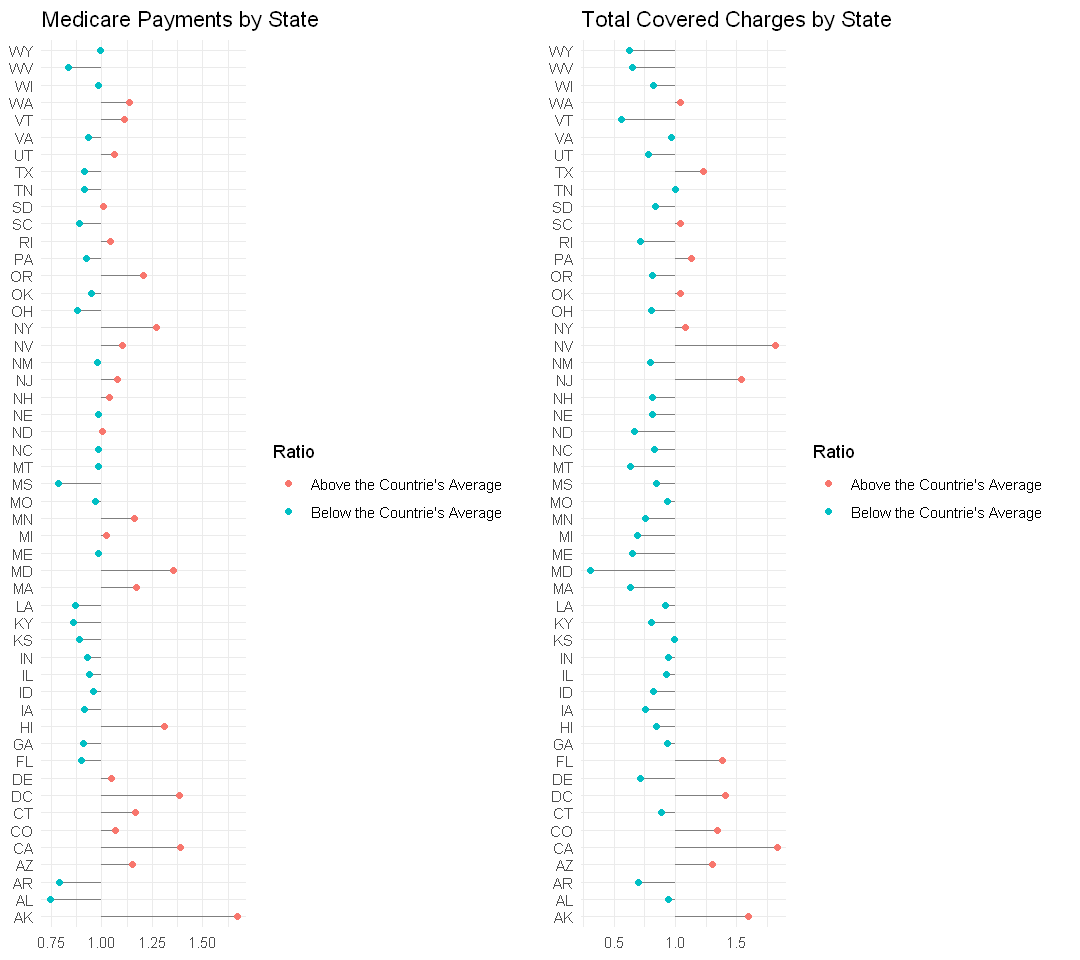

In [286]:
grid.arrange(medicare.payments, covered.charges, ncol=2)


Analyzing Average Provider Charges and Medicare Payments

#####which hospitals charged the most

In [339]:
df_top_charges <- payment %>% mutate(total_c = Average.Covered.Charges*Total.Discharges,
                        total_m = Average.Medicare.Payments*Total.Discharges) %>% 
  group_by(Provider.Name) %>%
  summarise(total_charges=sum(total_c), total_medicare_paid = sum(total_m),
            ratio_paid_charged = sum(total_m)/sum(total_c)) %>% 
  select(Provider.Name, total_charges)%>%
  top_n(10, wt = total_charges) %>%
  arrange(desc(total_charges))
knitr::kable(df_top_charges)



|Provider.Name                    | total_charges|
|:--------------------------------|-------------:|
|CEDARS-SINAI MEDICAL CENTER      |   10891534772|
|FLORIDA HOSPITAL                 |    8269513404|
|NEW YORK-PRESBYTERIAN HOSPITAL   |    7797460777|
|STANFORD HEALTH CARE             |    6384629917|
|UPMC PRESBYTERIAN SHADYSIDE      |    5833721453|
|METHODIST HOSPITAL               |    5432957684|
|MASSACHUSETTS GENERAL HOSPITAL   |    4334294154|
|UCSF MEDICAL CENTER              |    4087111977|
|HOSPITAL OF UNIV OF PENNSYLVANIA |    4080280869|
|GOOD SAMARITAN HOSPITAL          |    3991707913|

#####Among all hospitals Cedar-Sinai Medical Center had far away the highest total charges, followed by Florida and New York-Presbyterian Hospitals.

#####Which Hospitals Medicare paid the most

In [336]:
df_top_medicare <- payment %>% mutate(total_c = Average.Covered.Charges*Total.Discharges,
                        total_m = Average.Medicare.Payments*Total.Discharges) %>% 
  group_by(Provider.Name) %>%
  summarise(total_charges=sum(total_c), total_medicare_paid = sum(total_m),
            ratio_paid_charged = sum(total_m)/sum(total_c)) %>% 
  top_n(10, wt = total_medicare_paid) %>%
  select(Provider.Name, total_medicare_paid) %>%
  arrange(desc(total_medicare_paid))
#head(df_top_medicare, 10)
knitr::kable(df_top_medicare)



|Provider.Name                         | total_medicare_paid|
|:-------------------------------------|-------------------:|
|NEW YORK-PRESBYTERIAN HOSPITAL        |          1766867375|
|MAYO CLINIC HOSPITAL ROCHESTER        |          1211878997|
|CEDARS-SINAI MEDICAL CENTER           |          1135096549|
|FLORIDA HOSPITAL                      |          1111528470|
|JOHNS HOPKINS HOSPITAL, THE           |           988861415|
|MASSACHUSETTS GENERAL HOSPITAL        |           987901837|
|YALE-NEW HAVEN HOSPITAL               |           952685580|
|MOUNT SINAI HOSPITAL                  |           873085312|
|STANFORD HEALTH CARE                  |           837505387|
|UNIVERSITY OF MARYLAND MEDICAL CENTER |           825026221|

#####Among all hospitals NEW YORK-PRESBYTERIAN HOSPITAL had far away the highest total medicare paid, followed by MAYO CLINIC HOSPITAL ROCHESTER and CEDARS-SINAI MEDICAL CENTER.

#####Which hospitals has the highest number of discharges

In [335]:
df_top_discharges <- payment %>% 
  group_by(Provider.Name) %>%
  summarise(total_discharges = sum(Total.Discharges)) %>%
  top_n(10, wt = total_discharges) %>%
   arrange(desc(total_discharges))
knitr::kable(df_top_discharges)



|Provider.Name                          | total_discharges|
|:--------------------------------------|----------------:|
|FLORIDA HOSPITAL                       |        100914.15|
|METHODIST HOSPITAL                     |         76730.00|
|NEW YORK-PRESBYTERIAN HOSPITAL         |         72634.00|
|CHRISTIANA CARE HEALTH SERVICES, INC.  |         63292.48|
|BEAUMONT HOSPITAL, ROYAL OAK           |         58251.41|
|MAYO CLINIC HOSPITAL ROCHESTER         |         58034.49|
|YALE-NEW HAVEN HOSPITAL                |         56042.10|
|GOOD SAMARITAN HOSPITAL                |         52787.00|
|METHODIST HEALTHCARE MEMPHIS HOSPITALS |         52630.06|
|CEDARS-SINAI MEDICAL CENTER            |         50285.15|

#####The Most Expensive DRG Codes Across Medicare

In [326]:
df_top <- payment %>% mutate(total_c = Average.Covered.Charges*Total.Discharges,
                        total_p = Average.Medicare.Payments*Total.Discharges) %>% 
  group_by(DRG.Definition) %>%
  summarise(total_charges=sum(total_c), total_paid = sum(total_p),
            ratio_paid_charged = sum(total_p)/sum(total_c)) %>% 
  top_n(10, wt = total_charges) %>%
  arrange(desc(total_charges))
#df_top
knitr::kable(df_top)



|DRG.Definition                                                            | total_charges|  total_paid| ratio_paid_charged|
|:-------------------------------------------------------------------------|-------------:|-----------:|------------------:|
|470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC  |   84930404714| 17029623828|          0.2005127|
|871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC                  |   65230094039| 13057983699|          0.2001834|
|853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC              |   36560676172|  7975988638|          0.2181576|
|291 - HEART FAILURE & SHOCK W MCC                                         |   35176241332|  7654986024|          0.2176181|
|871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC                  |   28299401092|  6088127660|          0.2151327|
|460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC                               |   26061078385|  5578328542|          0.2140483

#####Most expensive DRG-S

In [11]:
drg.by.state <- payment %>% group_by(DRG.Definition, Provider.State, Year) %>%
        summarise(count =n(),
                  State.mean.total.discharges          = mean(Total.Discharges),
                  State.mean.average.covered.charges   = mean(Average.Covered.Charges),
                  State.mean.average.total.payments    = mean(Average.Total.Payments),
                  State.mean.average.medicare.payments = mean(Average.Medicare.Payments))
                 
dim(drg.by.state); 

[1] 46356     8

In [155]:
#head(drg.by.state)

In [327]:
usstates1 <- payment %>%
  group_by(Provider.State) %>% filter(Year == 2015) %>%
  summarize(totalcost = sum(Average.Covered.Charges, na.rm =TRUE))%>%
  mutate(percent = (totalcost/sum(totalcost))*100)%>%
  arrange(desc(totalcost))

head(usstates1, 10)
usstates1 <- payment %>%
  group_by(Provider.State) %>% filter(Year == 2016) %>%
  summarize(totalcost = sum(Average.Covered.Charges, na.rm =TRUE))%>%
  mutate(percent = (totalcost/sum(totalcost))*100)%>%
  arrange(desc(totalcost))

head(usstates1, 10)

usstates1 <- payment %>%
  group_by(Provider.State) %>% filter(Year == 2017) %>%
  summarize(totalcost = sum(Average.Covered.Charges, na.rm =TRUE))%>%
  mutate(percent = (totalcost/sum(totalcost))*100)%>%
  arrange(desc(totalcost))

head(usstates1, 10)

Provider.State,totalcost,percent
CA,1476417090,13.295152
FL,1043924734,9.400554
TX,903280136,8.134048
NY,622842762,5.608706
PA,607312763,5.468858
NJ,588864040,5.302727
IL,468739789,4.221007
OH,347818153,3.132106
GA,275049708,2.476826
MI,270847939,2.438989


Provider.State,totalcost,percent
CA,1543588503,13.436414
FL,1085126069,9.445654
TX,946373103,8.237857
NY,662826978,5.769684
PA,616029882,5.362331
NJ,585908481,5.100135
IL,474406700,4.129549
OH,369976137,3.220517
GA,284286871,2.474621
VA,277670938,2.417031


Provider.State,totalcost,percent
CA,1619088701,13.482918
FL,1137603834,9.473365
TX,989987617,8.244095
NY,693400053,5.774270
PA,642160074,5.347571
NJ,569842839,4.745351
IL,493844773,4.112479
OH,387530017,3.227146
GA,302108690,2.515802
VA,297896863,2.480728


#####Most common hospital discharges within 3 years, and how it changed over time. "871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC	" is leading

In [328]:
top10totaldischarges15 <- payment %>% filter(Year == 2015) %>% select(DRG.Definition, Total.Discharges) %>%
group_by(DRG.Definition) %>% 
summarise(total.discharges = sum(Total.Discharges)) %>%
mutate(percent = total.discharges/sum(total.discharges))%>%
arrange(desc(total.discharges))
head(top10totaldischarges15, 10)

top10totaldischarges16 <- payment %>% filter(Year == 2016) %>% select(DRG.Definition, Total.Discharges) %>%
group_by(DRG.Definition) %>% 
summarise(total.discharges = sum(Total.Discharges)) %>%
mutate(percent = total.discharges/sum(total.discharges))%>%
arrange(desc(total.discharges))
head(top10totaldischarges16, 10)

top10totaldischarges17 <- payment %>% filter(Year == 2017) %>% select(DRG.Definition, Total.Discharges) %>%
group_by(DRG.Definition) %>% 
summarise(total.discharges = sum(Total.Discharges)) %>%
mutate(percent = total.discharges/sum(total.discharges))%>%
arrange(desc(total.discharges))
head(top10totaldischarges17, 10)

DRG.Definition,total.discharges,percent
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,521358,0.07013846
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,463930,0.06241266
291 - HEART FAILURE & SHOCK W MCC,221654,0.02981919
292 - HEART FAILURE & SHOCK W CC,192975,0.02596099
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",182443,0.02454412
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,150680,0.02027103
872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W/O MCC,150151,0.02019986
194 - SIMPLE PNEUMONIA & PLEURISY W CC,148886,0.02002968
683 - RENAL FAILURE W CC,147311,0.01981780
193 - SIMPLE PNEUMONIA & PLEURISY W MCC,144595,0.01945241


DRG.Definition,total.discharges,percent
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC,530050.4,0.07332161
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,462864.6,0.06402783
291 - HEART FAILURE & SHOCK W MCC,233015.0,0.03223285
292 - HEART FAILURE & SHOCK W CC,181587.0,0.02511884
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",165909.1,0.02295013
872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W/O MCC,151092.0,0.02090048
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,144212.0,0.01994877
189 - PULMONARY EDEMA & RESPIRATORY FAILURE,142982.0,0.01977863
683 - RENAL FAILURE W CC,141759.0,0.01960945
193 - SIMPLE PNEUMONIA & PLEURISY W MCC,137674.0,0.01904438


DRG.Definition,total.discharges,percent
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC,597736,0.08096455
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,510632,0.06916614
291 - HEART FAILURE & SHOCK W MCC,359442,0.04868714
190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC,215525,0.02919330
189 - PULMONARY EDEMA & RESPIRATORY FAILURE,165613,0.02243262
872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W/O MCC,157851,0.02138124
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",155843,0.02110925
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,138497,0.01875970
683 - RENAL FAILURE W CC,134011,0.01815206
378 - G.I. HEMORRHAGE W CC,131163,0.01776629


In [329]:
kak <- head(top10totaldischarges17, 10)

In [330]:
top10totaldischarges15 <- payment %>% filter(Year == 2015) %>% select(DRG.Definition, Total.Discharges) %>%
group_by(DRG.Definition) %>% 
summarise(total.discharges = sum(Total.Discharges)) %>%
mutate(percent = total.discharges/sum(total.discharges))%>%
arrange(desc(total.discharges))
head(top10totaldischarges15, 10)

top10totaldischarges16 <- payment %>% filter(Year == 2016) %>% select(DRG.Definition, Total.Discharges) %>%
group_by(DRG.Definition) %>% 
summarise(total.discharges = sum(Total.Discharges)) %>%
mutate(percent = total.discharges/sum(total.discharges))%>%
arrange(desc(total.discharges))
head(top10totaldischarges16, 10)

top10totaldischarges17 <- payment %>% filter(Year == 2017) %>% select(DRG.Definition, Total.Discharges) %>%
group_by(DRG.Definition) %>% 
summarise(total.discharges = sum(Total.Discharges)) %>%
mutate(percent = total.discharges/sum(total.discharges))%>%
arrange(desc(total.discharges))
head(top10totaldischarges17, 10)

DRG.Definition,total.discharges,percent
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,521358,0.07013846
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,463930,0.06241266
291 - HEART FAILURE & SHOCK W MCC,221654,0.02981919
292 - HEART FAILURE & SHOCK W CC,192975,0.02596099
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",182443,0.02454412
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,150680,0.02027103
872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W/O MCC,150151,0.02019986
194 - SIMPLE PNEUMONIA & PLEURISY W CC,148886,0.02002968
683 - RENAL FAILURE W CC,147311,0.01981780
193 - SIMPLE PNEUMONIA & PLEURISY W MCC,144595,0.01945241


DRG.Definition,total.discharges,percent
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC,530050.4,0.07332161
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,462864.6,0.06402783
291 - HEART FAILURE & SHOCK W MCC,233015.0,0.03223285
292 - HEART FAILURE & SHOCK W CC,181587.0,0.02511884
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",165909.1,0.02295013
872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W/O MCC,151092.0,0.02090048
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,144212.0,0.01994877
189 - PULMONARY EDEMA & RESPIRATORY FAILURE,142982.0,0.01977863
683 - RENAL FAILURE W CC,141759.0,0.01960945
193 - SIMPLE PNEUMONIA & PLEURISY W MCC,137674.0,0.01904438


DRG.Definition,total.discharges,percent
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC,597736,0.08096455
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,510632,0.06916614
291 - HEART FAILURE & SHOCK W MCC,359442,0.04868714
190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC,215525,0.02919330
189 - PULMONARY EDEMA & RESPIRATORY FAILURE,165613,0.02243262
872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W/O MCC,157851,0.02138124
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",155843,0.02110925
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,138497,0.01875970
683 - RENAL FAILURE W CC,134011,0.01815206
378 - G.I. HEMORRHAGE W CC,131163,0.01776629


Most common hospital discharges
Ten most common inpatient diagnoses
Most expensive inpatient diagnoses

 Variation of hospital charges for heart implant or implant of heart assist system surgery